In [4]:
import os
import numpy as np
from matplotlib import pyplot as plt

from PIL import Image
from collections import Counter
from sklearn.cluster import KMeans

%matplotlib inline

In [28]:
# Utility function, rgb to hex
def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex

# Image color extraction using Scikit Learn

We'll see how simple it is to identify the most important colors in an image using the K Means, unsupervised ML model from the Scikit Learn package.

### Step 1: Define some meta variables

You can play around with the following variables to generate different results. `CLUSTERS` is probably the most important one, as it defines the number of colors we'll extract from the image.

In [29]:
PATH = './sample-image-1.jpg'
WIDTH = 128
HEIGHT = 128
CLUSTERS = 6

### Step 2: Open the image using Pillow

We'll use the Pillow library to open and manipulate the image.

In [30]:
image = Image.open(PATH)

In [31]:
image.size

(1650, 1100)

In [32]:
print("Loaded {f} image. Size: {s:.2f} KB. Dimensions: ({d})".format(
    f=image.format, s=os.path.getsize(PATH) / 1024, d=image.size))

Loaded JPEG image. Size: 227.64 KB. Dimensions: ((1650, 1100))


### Step 3: Resize image

The ML model will take considerably longer if the image is large. We'll try to resize it keeping the aspect ratio.

In [33]:
def calculate_new_size(image):
    if image.width >= image.height:
        wpercent = (WIDTH / float(image.width))
        hsize = int((float(image.height) * float(wpercent)))
        new_width, new_height = WIDTH, hsize
    else:
        hpercent = (HEIGHT / float(image.height))
        wsize = int((float(image.width) * float(hpercent)))
        new_width, new_height = wsize, HEIGHT
    return new_width, new_height

In [34]:
calculate_new_size(image)

(128, 85)

In [35]:
new_width, new_height = calculate_new_size(image)

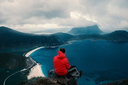

In [36]:
image.resize((new_width, new_height), Image.ANTIALIAS)

In [37]:
image = image.resize((new_width, new_height), Image.ANTIALIAS)

### Step 4: Creating the numpy arrays

Our ML Model needs the image as an array of pixels. We explained this in detail in one of [our workshops](https://www.youtube.com/watch?v=2Q4L3MtdAbY).

In [38]:
img_array = np.array(image)

In [39]:
img_vector = img_array.reshape((img_array.shape[0] * img_array.shape[1], 3))

### Step 5: Create the model and train it

We're ready for the true ML part. We'll create a model using `N` clusters and extract the colors.

In [40]:
model = KMeans(n_clusters=CLUSTERS)

In [41]:
labels = model.fit_predict(img_vector)

In [42]:
label_counts = Counter(labels)

In [43]:
total_count = sum(label_counts.values())

These are the colors extracted:

In [44]:
hex_colors = [
    rgb2hex(center) for center in model.cluster_centers_
]
hex_colors

['#d3cfc8', '#0a242d', '#3e7281', '#074359', '#a40e13', '#b1b8b8']

And this is the proportion of each color:

In [45]:
list(zip(hex_colors, list(label_counts.values())))

[('#d3cfc8', 2359),
 ('#0a242d', 1749),
 ('#3e7281', 663),
 ('#074359', 2845),
 ('#a40e13', 2981),
 ('#b1b8b8', 283)]

### Final Result:
We can see now the final result of the color extracted:

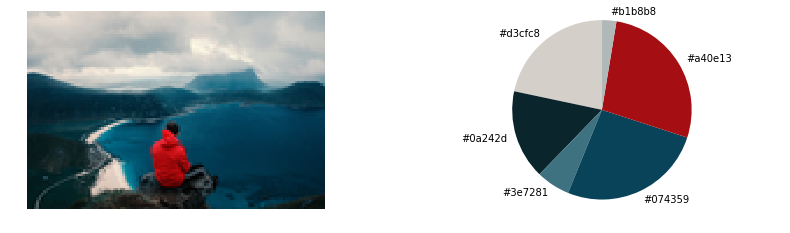

In [47]:
plt.figure(figsize=(14, 8))
plt.subplot(221)
plt.imshow(image)
plt.axis('off')

plt.subplot(222)
plt.pie(label_counts.values(), labels=hex_colors, colors=[color / 255 for color in model.cluster_centers_], startangle=90)
plt.axis('equal')
plt.show()
